In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [ ]:
from helpers import load_data

# load dataset
x, y = load_data()

In [3]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [ ]:
k_indices = build_k_indices(y, 4, 1)
print(k_indices,k_indices)
print((np.delete(k_indices, 3, 0)).flatten())
print( k_indices[3])

In [ ]:
from costs import compute_mse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # get k'th subgroup in test, others in train
    # ***************************************************
    idx_tr = (np.delete(k_indices, 3, 0)).flatten()
    idx_te = k_indices[k]
    x_tr, y_tr = x[idx_tr], y[idx_tr]
    x_te, y_te = x[idx_te], y[idx_te]
    # ***************************************************
    # form data with polynomial degree
    # ***************************************************
    x_poly_tr = build_poly(x_tr, degree)   
    x_poly_te = build_poly(x_te, degree)
    # ***************************************************
    # ridge regression:
    # ***************************************************
    loss_tr, ws = ridge_regression(y_tr, x_poly_tr, lambda_)
    # ***************************************************
    # calculate the loss for train and test data
    # ***************************************************
    loss_te = compute_mse(y_te, x_poly_te, ws)
    return loss_tr, loss_te

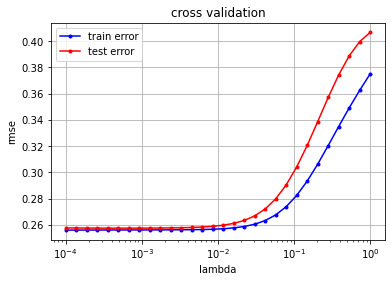

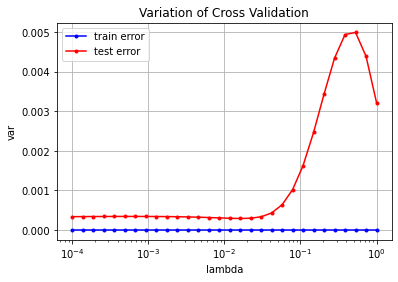

In [6]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    var_tr = []
    var_te = []
    # ***************************************************
    # cross validation:
    # ***************************************************  
    for lambda_ in lambdas:
        k_indices = build_k_indices(y, k_fold, seed)
        loss_ave_tr = []; loss_ave_te = []
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_, degree)
            loss_ave_tr.append(np.sqrt(2*loss_tr)); loss_ave_te.append(np.sqrt(2*loss_te))
        rmse_tr.append(np.mean(loss_ave_tr))
        var_tr.append(np.var(loss_ave_tr))
        rmse_te.append(np.mean(loss_ave_te))
        var_te.append(np.var(loss_ave_te))
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)
    plt.figure()
    cross_validation_visualization(lambdas, var_tr, var_te)
    plt.title('Variation of Cross Validation')
    plt.ylabel('var')

cross_validation_demo()

In [ ]:
seed = 1
degrees = np.linspace(2,10,dtype=int)
k_fold = 4
lambda_ = 10e-2
# split data in k fold
k_indices = build_k_indices(y, k_fold, seed)
# define lists to store the loss of training data and test data
rmse_tr = []
rmse_te = []
var_tr = []
var_te = []
# ***************************************************
# cross validation:
# ***************************************************  
for degree in degrees:
    k_indices = build_k_indices(y, k_fold, seed)
    loss_ave_tr = []; loss_ave_te = []
    for k in range(k_fold):
        loss_tr, loss_te = cross_validation(y, x, k_indices, k, lambda_, degree)
        loss_ave_tr.append(np.sqrt(2*loss_tr)); loss_ave_te.append(np.sqrt(2*loss_te))
    rmse_tr.append(np.mean(loss_ave_tr))
    var_tr.append(np.var(loss_ave_tr))
    rmse_te.append(np.mean(loss_ave_te))
    var_te.append(np.var(loss_ave_te))
plt.figure()
plt.plot(degrees, rmse_tr, marker=".", color='b', label='train error')
plt.plot(degrees, rmse_te, marker=".", color='r', label='test error')
plt.title('Best polynomial degree is '+str(degrees[np.argmin(rmse_te)]))
plt.xlabel('rmse')
plt.ylabel('polynomial degree')
plt.figure()
plt.plot(degrees, var_tr, marker=".", color='b', label='train error')
plt.plot(degrees, var_te, marker=".", color='r', label='test error')
plt.title('Most stable polynomial degree model is '+str(degrees[np.argmin(var_te)]))
plt.xlabel('polynomial degree')
plt.ylabel('var')

## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

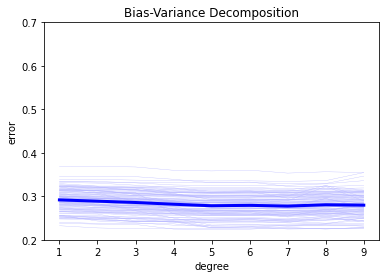

In [8]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(index_seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # split data with a specific seed
        # ***************************************************
        x_tr, y_tr, x_te, y_te = split_data(x, y, ratio_train, index_seed)
        # ***************************************************
        # bias_variance_decomposition
        # ***************************************************
        for degree in degrees:
            x_poly_tr = build_poly(x_tr, degree)   
            x_poly_te = build_poly(x_te, degree)
            mse, ws = least_squares(y_tr, x_poly_tr)
            rmse_tr[index_seed,degree-1] = np.sqrt(2*mse)
            rmse_te[index_seed,degree-1] = np.sqrt(2*compute_mse(y_te, x_poly_te, ws))
    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()

In [ ]:
a = np.reshape(range(10),(2,5))
print(a)
print(a.T)